In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# impor
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Sets/train (1).csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# # Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
print(df.describe())
# df.describe()

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

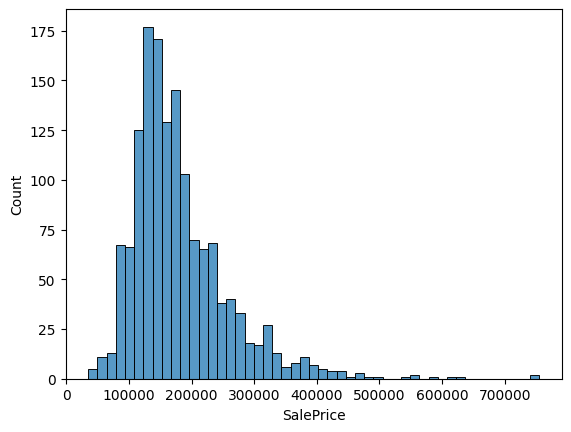

In [ ]:
# Visualize the distribution of the target variable 'SalePrice'
sns.histplot(df['SalePrice'])
plt.show()


In [ ]:
# Drop columns with a high percentage of missing values
# For example, you can set a threshold (e.g., 30%) and drop columns with more than 30% missing values
threshold = 0.3
cols_to_drop = missing_values[missing_values / len(df) > threshold].index
df = df.drop(columns=cols_to_drop)

# Impute missing values for numerical columns (e.g., with mean)
df.fillna(df.mean(), inplace=True)

# Impute missing values for categorical columns (e.g., with mode)
df.fillna(df.mode().iloc[0], inplace=True)


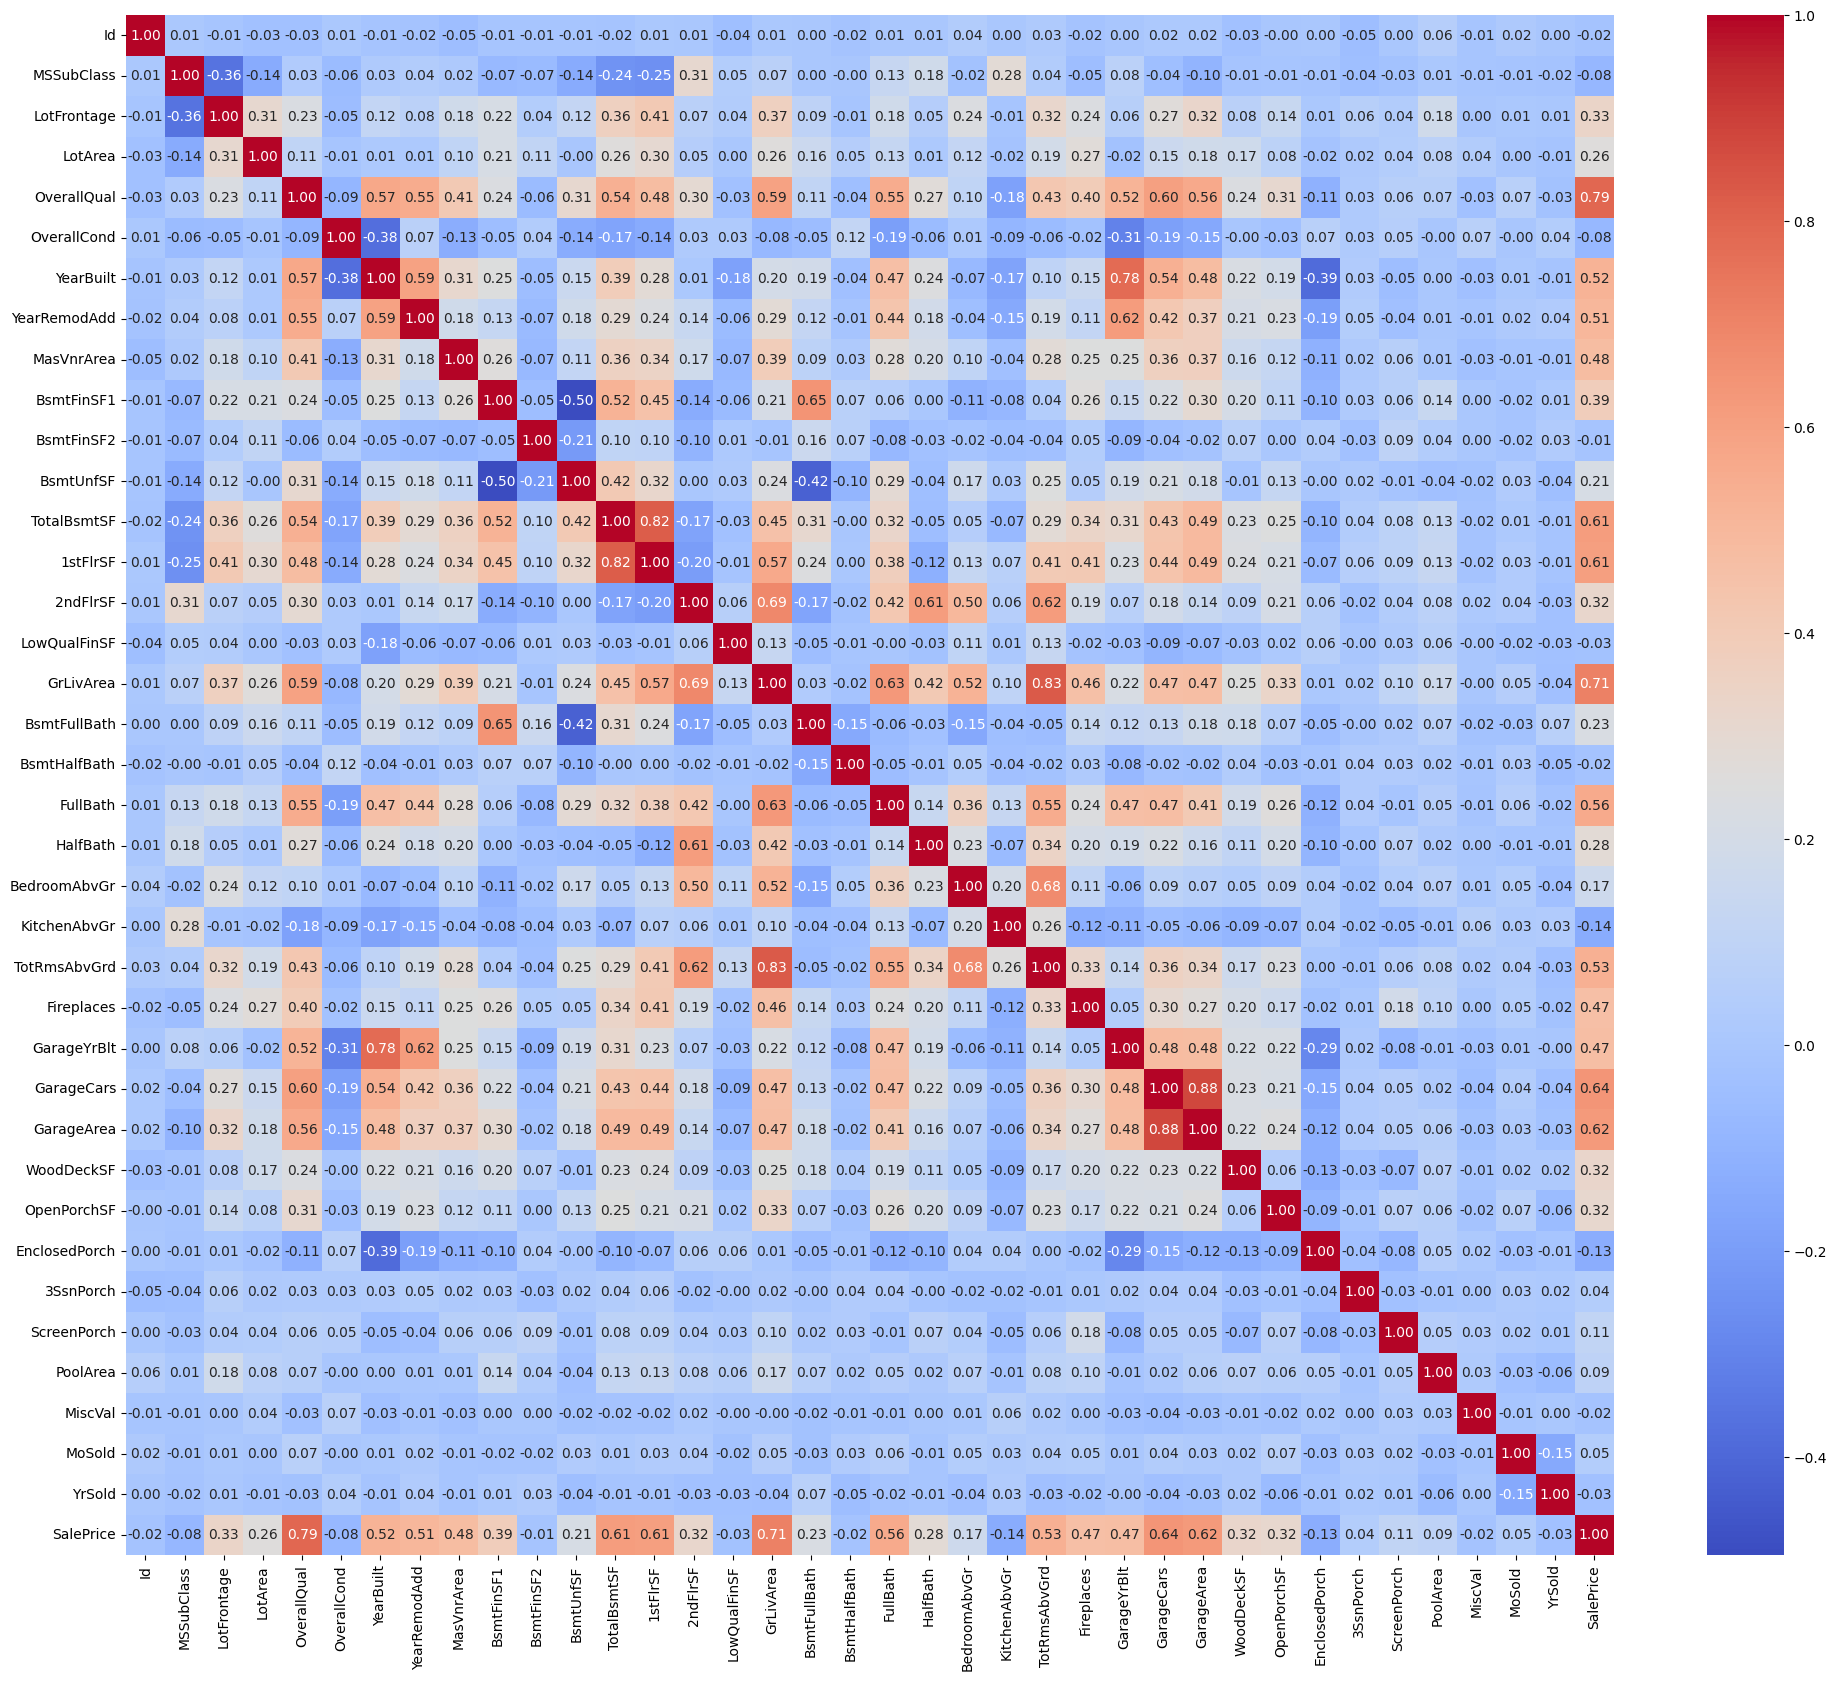

In [ ]:
# Explore correlation between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.733990586457528e+27
R-squared: -2.2606477737971194e+17


In [ ]:
# Import additional models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize and train additional models
rf_model = RandomForestRegressor(random_state=42)
svm_model = SVR()

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Evaluate additional models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print('Random Forest Model:')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')
print('\nSupport Vector Machine (SVM) Model:')
print(f'Mean Squared Error: {mse_svm}')
print(f'R-squared: {r2_svm}')


Random Forest Model:
Mean Squared Error: 817303414.5777733
R-squared: 0.893446068328625

Support Vector Machine (SVM) Model:
Mean Squared Error: 7858253481.385826
R-squared: -0.024500558271252082


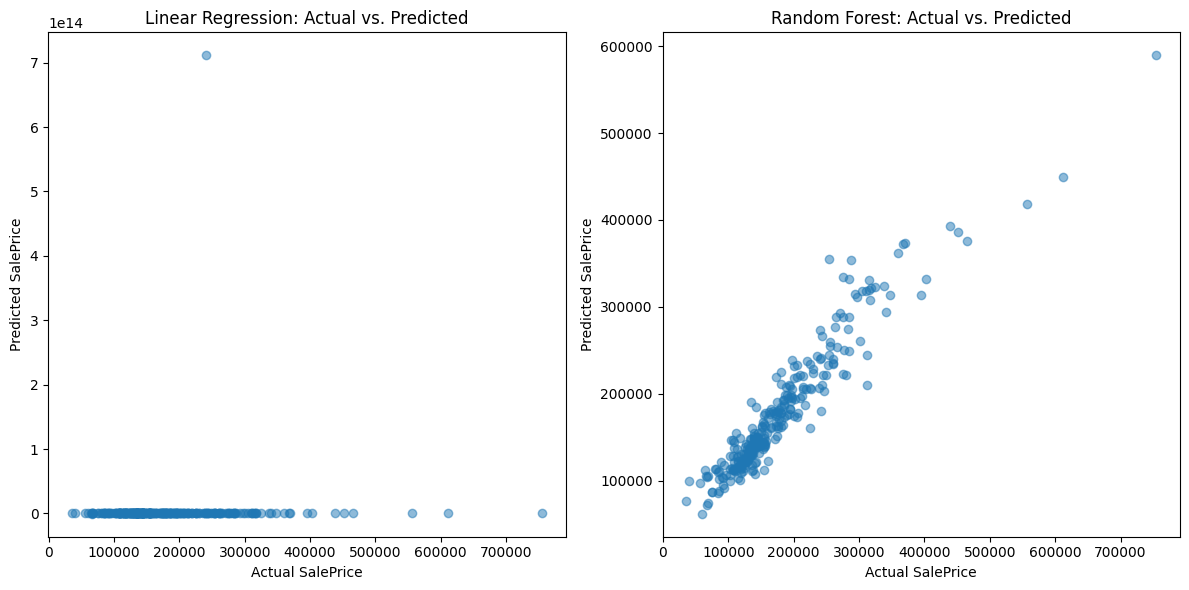

In [ ]:
# Visualize actual vs. predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')

plt.tight_layout()
plt.show()


In [ ]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for prediction
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print('Best Random Forest Model:')
print(f'Mean Squared Error: {mse_best_rf}')
print(f'R-squared: {r2_best_rf}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Model:
Mean Squared Error: 850497053.0107757
R-squared: 0.8891185289859176


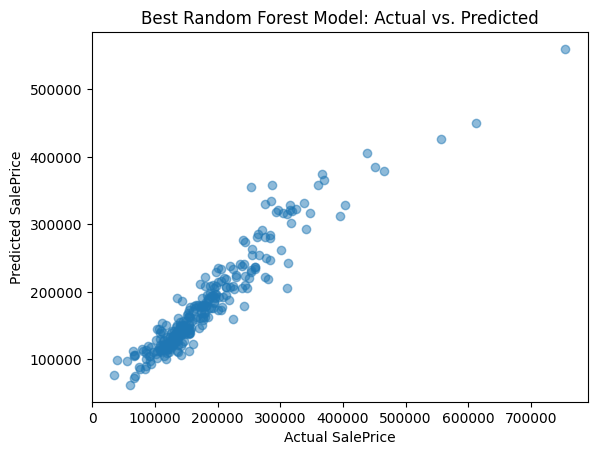

In [ ]:
# Visualize actual vs. predicted values for the best Random Forest model
plt.scatter(y_test, y_pred_best_rf, alpha=0.5)
plt.title('Best Random Forest Model: Actual vs. Predicted')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()


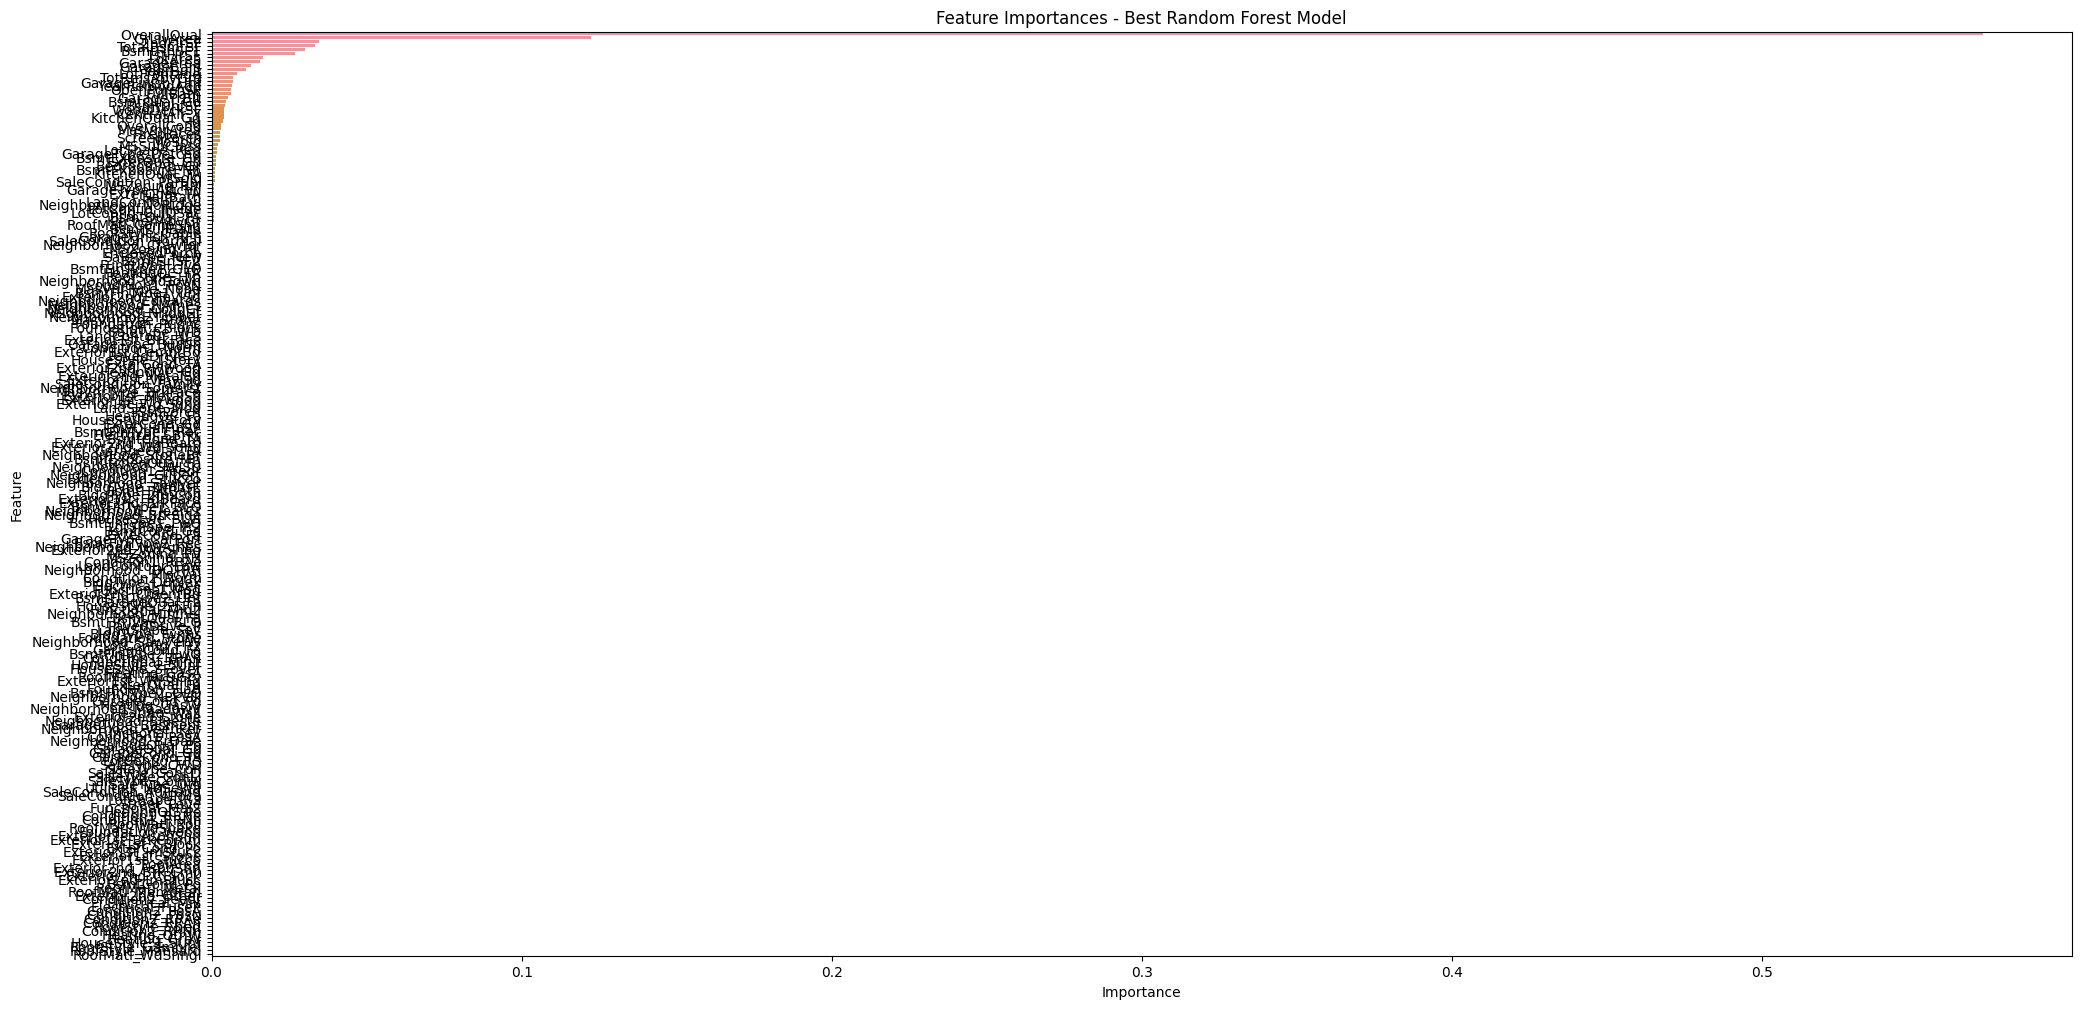

In [ ]:
# Extract feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(24, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances - Best Random Forest Model')
plt.show()


In [ ]:
# Select a feature for which you want to create a partial dependence plot
selected_feature = 'OverallQual'

# Create a DataFrame with the selected feature varied across its range
if X_test[selected_feature].dtype == 'O':  # Check if the feature is categorical
    feature_values = X_test[selected_feature].unique()
    pdp_data = pd.DataFrame({selected_feature: feature_values})
else:
    feature_range = np.linspace(X_test[selected_feature].min(), X_test[selected_feature].max(), num=100)
    pdp_data = pd.DataFrame({selected_feature: feature_range})

# Make predictions for the modified dataset
pdp_data['Predicted'] = best_rf_model.predict(pdp_data)

# Visualize the PDP
plt.plot(pdp_data[selected_feature], pdp_data['Predicted'], marker='o')
plt.title(f'Partial Dependence Plot for {selected_feature}')
plt.xlabel(selected_feature)
plt.ylabel('Predicted SalePrice')
plt.show()


IndexError: ignored